<a href="https://colab.research.google.com/github/jjjzhu-5847/MNIST-Digit-Classification-with-Neural-Network/blob/main/MNIST_Digit_Classification_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import library and Dependencies**

In [ ]:
import numpy as np # provide good array features
import matplotlib.pyplot as plt # data virtualation
import seaborn as sns # statis graph
import cv2 # computer vision
from google.colab.patches import cv2_imshow # show image in colab
from PIL import Image # open image...


# import tensorflow and keras to construst neural network
import tensorflow as tf # deep learning framework
tf.random.set_seed(3)
from tensorflow import keras # keras API
from tensorflow.keras.datasets import mnist# import mnist dataset
from tensorflow.math import confusion_matrix # confusion matrix

# **Load the MNIST data from keras**

In [ ]:
# load the data from mnist set
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# print the shape of the sets
# x_train has 60000 28 X 28 grayscale(1 color channel) pictures, with 0-255 range
# y_train has 60000 labels with 0-9 range
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


MNIST dataset shape:

x_train: (60000, 28, 28)

y_train: (60000,)

x_test: (10000, 28, 28)

y_test: (10000,)

The 10th picture has shape (28, 28)


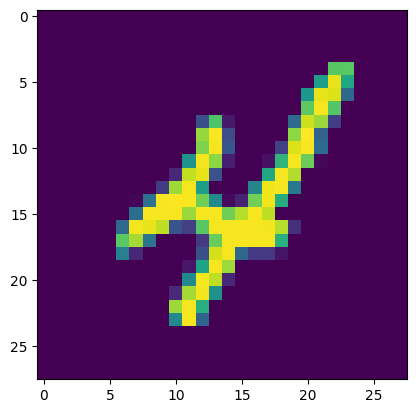

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

In [ ]:
# check the shape of the 10th picture
print(f'The 10th picture has shape {x_train[9].shape}')

# print the 10th picture to verify the data set
cv2_imshow(x_train[9])

plt.imshow(x_train[9])
plt.show()

# print the 10th picture matrix
print(x_train[9])

In [ ]:
# print the 10th picture label
print(f'The 10th image label is {y_train[9]}')


# make sure the lable set has unique valeue
print(f'The unique labels are {np.unique(y_train)}')

The 10th image label is 4
The unique labels are [0 1 2 3 4 5 6 7 8 9]


Because all images are resized and grayscaled, so no need to modify the images

In [ ]:
# scale the data. Each pixel has range 0-255
# We want it to scale to 0-1
x_train = x_train/255
x_test = x_test/255

# print the 10th picture matrix again
# print(x_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# **Building the Neural Network**

In [ ]:
# set up the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

# compile the network. Set up the optimizer, loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train,y_train,validation_split=0.1,epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8041 - loss: 0.6593 - val_accuracy: 0.9517 - val_loss: 0.1773
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9383 - loss: 0.2075 - val_accuracy: 0.9607 - val_loss: 0.1374
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9529 - loss: 0.1560 - val_accuracy: 0.9645 - val_loss: 0.1232
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9620 - loss: 0.1265 - val_accuracy: 0.9653 - val_loss: 0.1206
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9679 - loss: 0.1073 - val_accuracy: 0.9653 - val_loss: 0.1219
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9731 - loss: 0.0936 - val_accuracy: 0.9657 - val_loss: 0.1235
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9761 - loss: 0.0834 - val_accuracy: 0.9642 - val_loss: 0.1252
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9785 - loss: 0.0753 - 

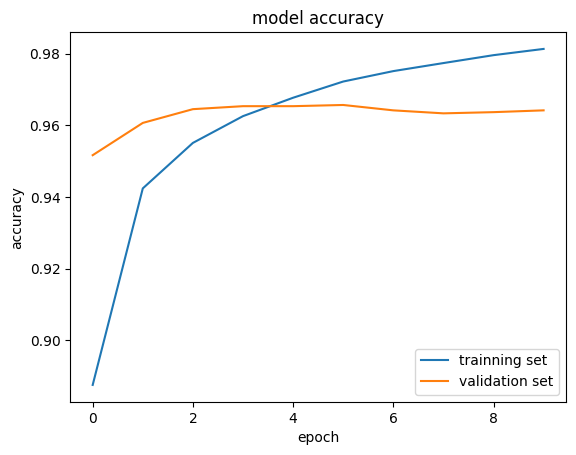

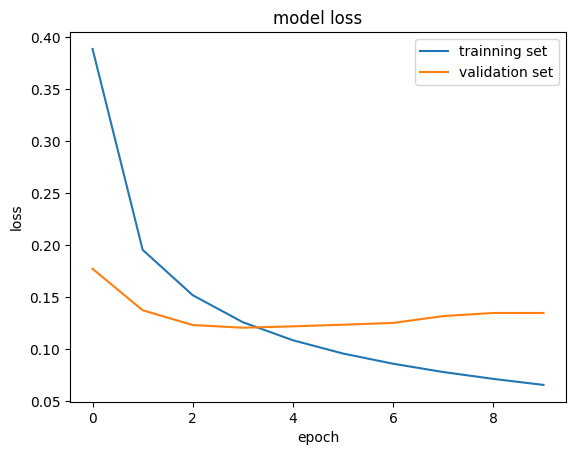

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['trainning set', 'validation set'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['trainning set', 'validation set'], loc='upper right')
plt.show()

# **Evaluate with the testing data set**

In [ ]:
# evaluate the model with test dataset
loss,accuarcy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9594 - loss: 0.1402


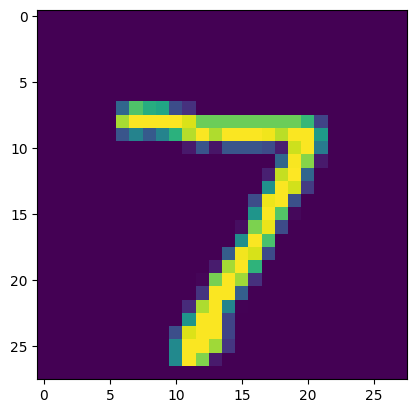

The 1st image label is 7
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[3.6512120e-07 4.4278941e-06 9.2366019e-05 6.6153039e-03 9.0791631e-11
 1.5822396e-05 5.0072713e-11 9.9322301e-01 1.4026518e-05 3.4690151e-05]
The prediction is 7


In [ ]:
plt.imshow(x_test[0])
plt.show()

print(f'The 1st image label is {y_test[0]}')

# get the prediction for test data set
result = model.predict(x_test)
print(result[0])
print(f'The prediction is {np.argmax(result[0])}')

In [ ]:
# convert predict result to label
result_label = [np.argmax(i) for i in result]
print(result_label)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

# **Build Confusion Matrix**

In [ ]:
conf_mat = confusion_matrix(y_test,result_label)
print(conf_mat)

tf.Tensor(
[[ 962    0    2    2    1    1    2    2    7    1]
 [   0 1112    3    3    0    0    1    1   14    1]
 [   8    5  955   30    4    0    1   16   12    1]
 [   0    0    1  988    0    5    0    4    4    8]
 [   1    0    2    2  951    0    0    5    2   19]
 [   2    0    0   20    1  855    2    3    4    5]
 [   5    2    4    2   13   11  914    2    5    0]
 [   1    0    6    9    1    0    0 1003    1    7]
 [   4    0    2   15    8    4    1   12  924    4]
 [   2    4    0    8    9    5    0    7    2  972]], shape=(10, 10), dtype=int32)


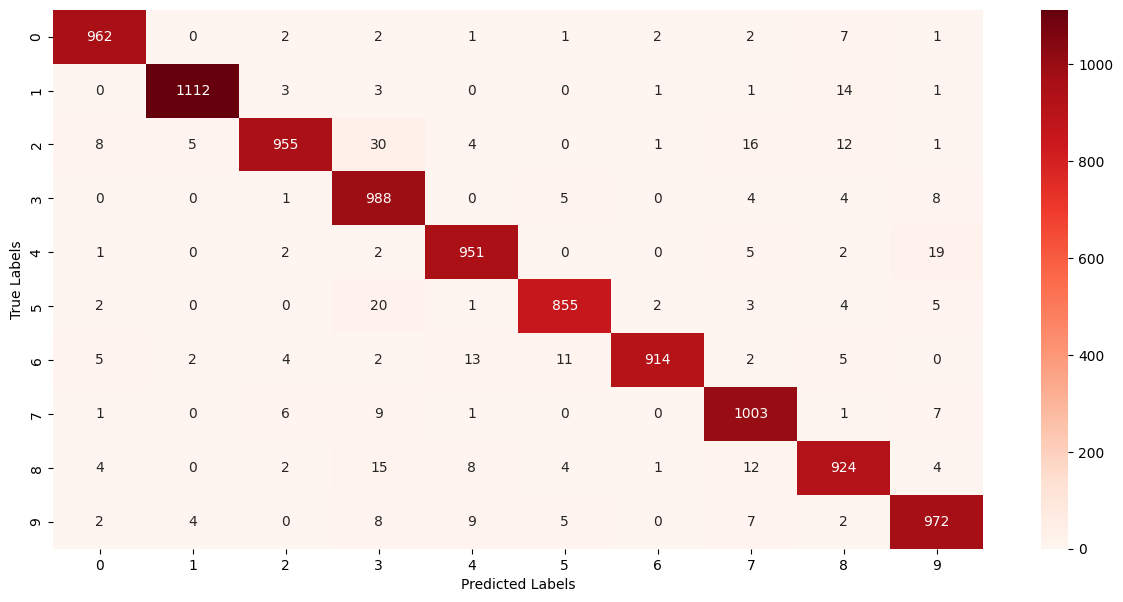

In [ ]:
# use plt and sns to draw figure for visulization
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# **Predict a new example**

In [ ]:
# import the image
image_path = input('Enter herev')
image = cv2.imread(image_path)

# turn it to grayscale picture
grayscale_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

print(type(grayscale_image))

# resize the picture
resized_image = cv2.resize(grayscale_image,(28,28))

# make sure it is 28 X 28 and it is grayscale
print(resized_image.shape)

cv2_imshow(resized_image)

# normalize the data set
resized_image = resized_image/255

# reshape the image
resized_image = np.reshape(resized_image,(1,28,28))

# predict the new image
result = model.predict(resized_image)
print(f'The prediction is {np.argmax(result)}')

Enter herev/content/f8ff205d-4767-434c-9ecb-f65680dc8a5a.png
<class 'numpy.ndarray'>
(28, 28)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The prediction is 5
